In [1]:
import warnings  
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from env import get_db_url
import acquire
import wrangle
pd.set_option("display.max_rows", 2500)

In [2]:
df, df_staff, df_multicohort, df_unimputed, df_non_curriculum, df_outliers = wrangle.full_wrangle()

This returned the following dataframes (reassign if you missed any):


,Description,Record Count,Percent of Raw df
Dataframe,,,
df,Fully cleaned dataframe,509409,56.6%
df_staff,Cohort == Staff,84031,9.33%
df_multicohort,Users listed in more than one cohort,22708,2.52%
df_unimputed,Users with unknown/unimputable cohorts,45904,5.1%
df_non_curriculum,"Accessess not related to the curriculum, i.e. directories, images",116539,12.9%
df_outliers,Accesses meeting outlier conditions,121626,13.5%


In [3]:
# join df and outliers as one dataframe
joint = pd.concat([df, df_outliers])

In [4]:
# removed user 782 since they are incorrectly identified as a DS student
joint = joint[joint.user_id != 782]

In [5]:
# create web development and datas cience dataframes
wd_df = joint[joint.program_type=='Web Development']
ds_df = joint[joint.program_type=='Data Science']

### 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

#### Web Development Students viewing access to Data Science Curriculum

In [6]:
# determine what a data science course is using science
wd_to_ds_access_df = wd_df[wd_df.path.str.contains('science')]

In [7]:
wd_to_ds_access_df = wd_to_ds_access_df.set_index(wd_to_ds_access_df.accessed)

In [8]:
# view daily cross-acess in web development to data science
daily_wd_to_ds_access_df = wd_to_ds_access_df.resample('D').count()

In [9]:
# create data for wd students viewing ds curriculum after 2019
after_2019 = wd_to_ds_access_df['2019-12-31':]

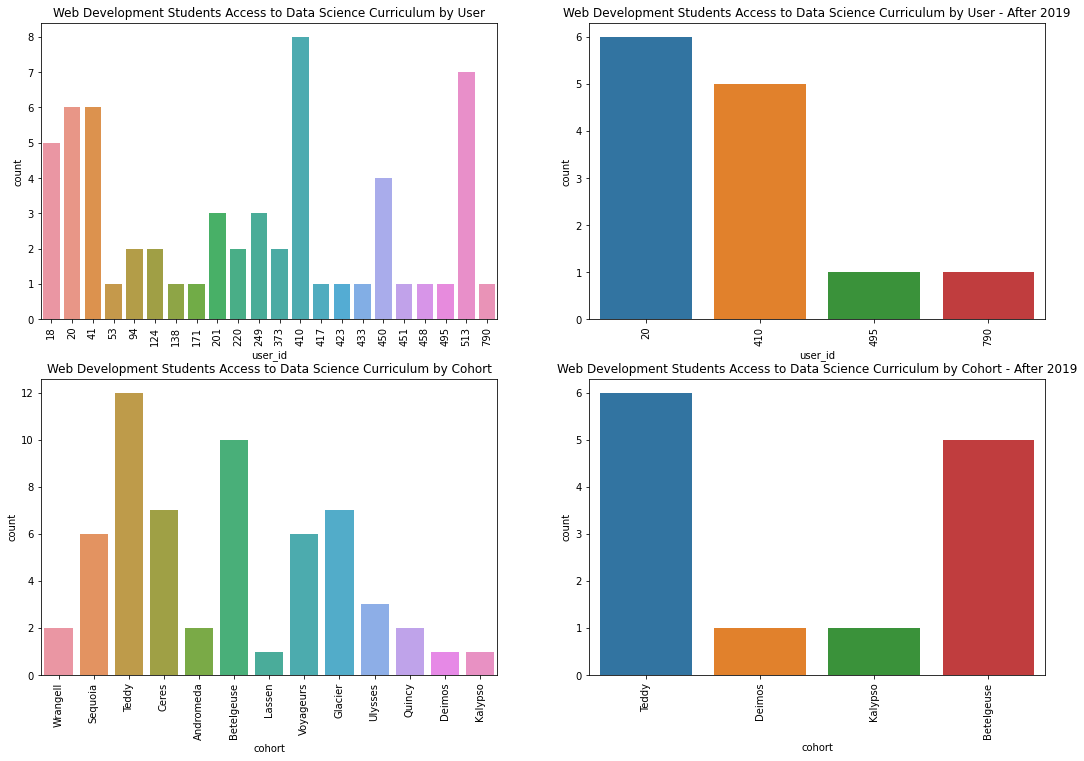

In [10]:
# view web development students that access data science by user id
plt.figure(figsize = (18, 12))
plt.subplot(221)
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User')
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(data=after_2019, x=after_2019.user_id)
plt.title('Web Development Students Access to Data Science Curriculum by User - After 2019')
plt.xticks(rotation=90)

plt.subplot(223)
sns.countplot(data=wd_to_ds_access_df, x=wd_to_ds_access_df.cohort)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort')
plt.xticks(rotation=90)

plt.subplot(224)
sns.countplot(data=after_2019, x=after_2019.cohort)
plt.title('Web Development Students Access to Data Science Curriculum by Cohort - After 2019')
plt.xticks(rotation=90)
plt.show()
plt.show()

**Notes:** Prior to 2019, 18 web development users accessed the data science curriculum. After the expected shut-off in 2019, four users continued to access the data science curriculum.

- User 220 accessed Data Science Program in April 2019. (Wrangle cohort, graduated Nov 2018)
- Accessed Data Science Program after 2019 cutoff:
    - User 20 - Teddy cohort, graduated May 2018, accessed Nov 2020 - Feb 2021. Viewed fundamentals.
    - User 410 - Betelgeuse cohort, graduated Oct 2019, accessed Jan 2020. Viewed fundamentals.
    - User 495 - Deimos cohort, graduated Feb 2020, accessed Nov 2020. Viewed fundamentals.
    - User 790 - Active student in Kalypso cohort, accessed in Mar 2021 (no lesson viewed).

#### Data Science Students accessing Web Development Curriculum

In [11]:
# determine what a web development course is using java
ds_to_wd_access_df=ds_df[ds_df.path.str.contains('java')]

In [12]:
# set index to datetime for resampling
ds_to_wd_access_df=ds_to_wd_access_df.set_index(ds_to_wd_access_df.accessed)

In [13]:
# create data for wd students viewing ds curriculum after 2019
ds_after_2019 = ds_to_wd_access_df['2019-12-31':]

In [14]:
# resample data to daily view
daily_ds_to_wd_access_df=ds_to_wd_access_df.resample('D').count()

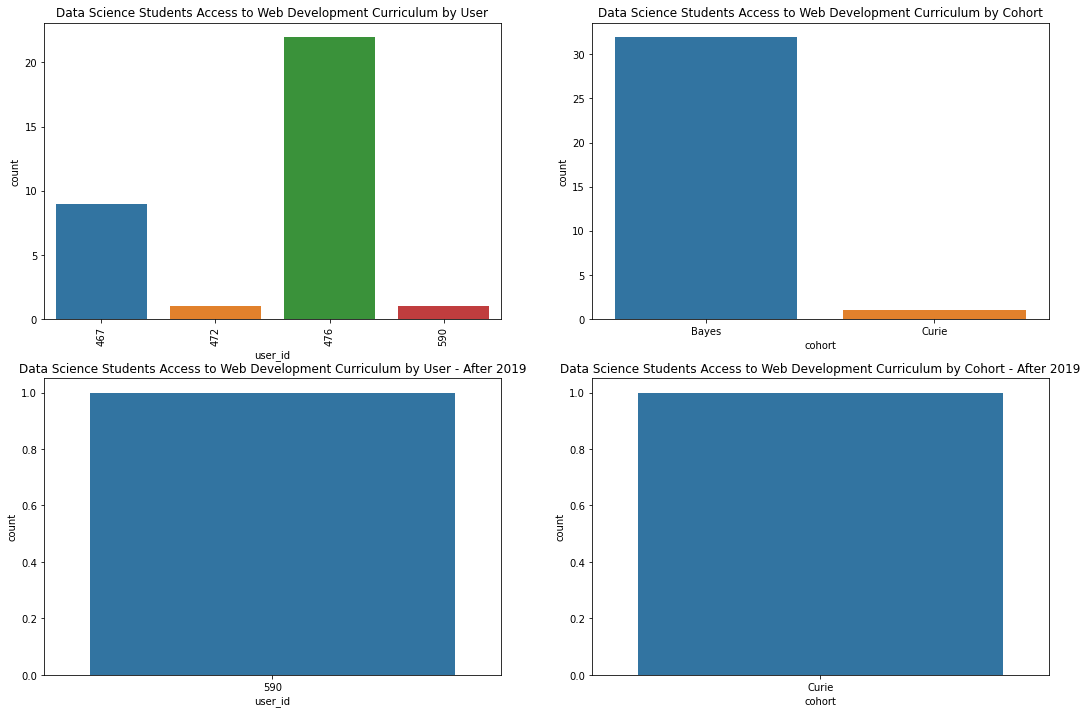

In [15]:
plt.figure(figsize = (18, 12))
plt.subplot(221)
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User')
plt.xticks(rotation=90)

plt.subplot(222)
sns.countplot(data=ds_to_wd_access_df, x=ds_to_wd_access_df.cohort)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort')

plt.subplot(223)
sns.countplot(data=ds_after_2019, x=ds_after_2019.user_id)
plt.title('Data Science Students Access to Web Development Curriculum by User - After 2019')

plt.subplot(224)
sns.countplot(data=ds_after_2019, x=ds_after_2019.cohort)
plt.title('Data Science Students Access to Web Development Curriculum by Cohort - After 2019')
plt.show()



**Data science students accessing web development courses ended in 2019, but there was one cross-curriculum access in May 2020.**

**Notes:** Most users utilizing cross-curriculum were in the Bayes cohort and were active students at the time of accessing the curriculum, prior to the end of cross-curriculum access.
- The one outlier in May 2020 was in the Curie cohort.
- User 590: Accessed Web Development curriculum May 2020, viewed Java-II/object-oriented-programming.

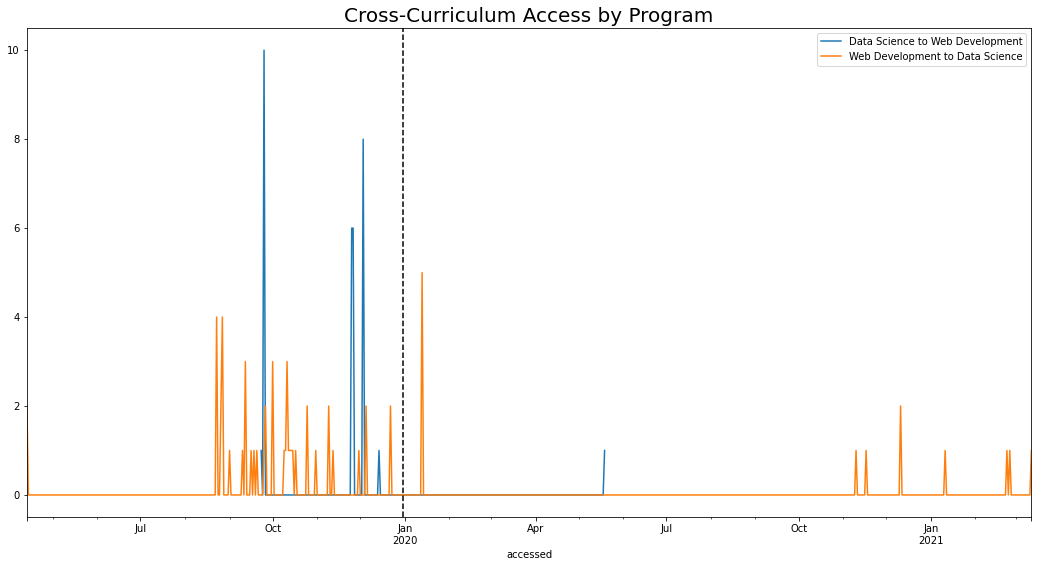

In [16]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access_df.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access_df.program_id.plot(label='Web Development to Data Science')
plt.title('Cross-Curriculum Access by Program', fontsize=20)
plt.axvline(pd.Timestamp('2019-12-31'),color='black',ls='--')
plt.legend()
plt.show()

In [17]:
# review user 220
df[(df.user_id==220) & (df.path.str.contains('science'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
213037,2019-04-13 01:39:14,datascience,70.120.5.227,220,2.0,Web Development,Wrangell,2018-07-23,2018-11-29,Not Lesson,1
213044,2019-04-13 01:40:39,data-science,70.120.5.227,220,2.0,Web Development,Wrangell,2018-07-23,2018-11-29,Not Lesson,1


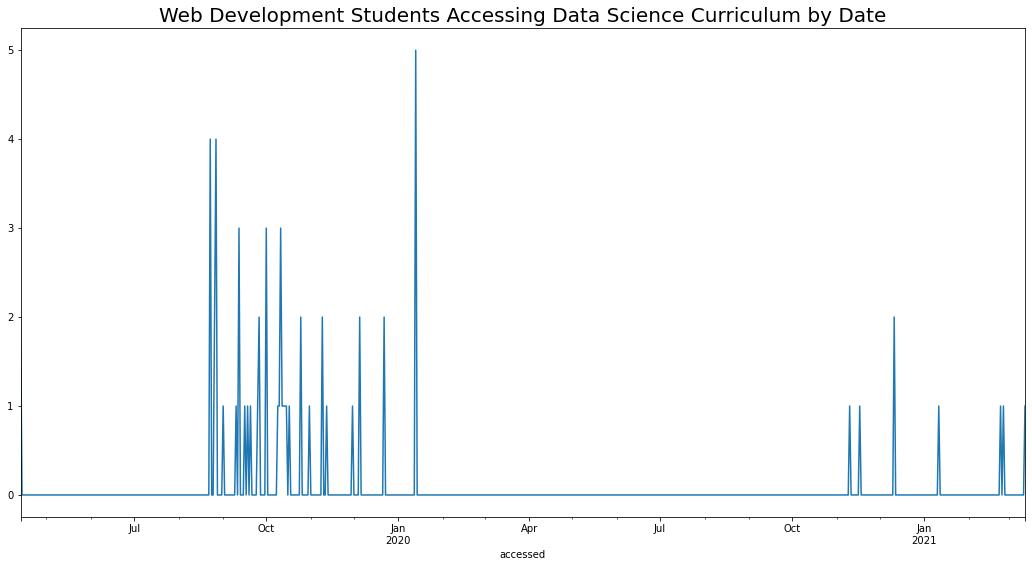

In [18]:
plt.figure(figsize = (18, 9))
daily_wd_to_ds_access_df.program_id.plot()
plt.title('Web Development Students Accessing Data Science Curriculum by Date', fontsize=20)
plt.show()

In [19]:
df[(df.user_id==20) & (df.path.str.contains('science'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
606165,2020-11-10 10:14:09,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,10
631543,2020-12-11 16:06:49,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,16
631546,2020-12-11 16:06:59,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,16
648737,2021-01-11 09:42:53,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,9
685568,2021-02-23 22:01:51,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,22
686515,2021-02-25 09:02:46,fundamentals/intro-to-data-science,104.190.242.242,20,2.0,Web Development,Teddy,2018-01-08,2018-05-17,fundamentals.intro-to-data-science,9


In [20]:
df[(df.user_id==495) & (df.path.str.contains('science'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
611437,2020-11-17 08:40:22,fundamentals/intro-to-data-science,72.191.58.18,495,2.0,Web Development,Deimos,2019-09-16,2020-02-27,fundamentals.intro-to-data-science,8


In [21]:
df[(df.user_id==790) & (df.path.str.contains('science'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
700807,2021-03-12 10:13:21,datascience,99.173.134.103,790,2.0,Web Development,Kalypso,2020-11-02,2021-05-04,Not Lesson,10


**Notes:** Prior to the end of 2019, 13 Web Development cohorts viewed the Data Science curriculum, after the expected shut off 3 cohorts were viewing cross-curriculum data. Teddy is the main contender.

In [22]:
# review user 590
joint[(joint.user_id==590) & (joint.path.str.contains('java'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
469433,2020-05-19 16:03:32,java-ii/object-oriented-programming,130.45.47.56,590,3.0,Data Science,Curie,2020-02-03,2020-07-07,java-ii.object-oriented-programming,16


In [23]:
# review user 472
joint[(joint.user_id==472) & (joint.path.str.contains('java'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
347356,2019-11-26 15:32:05,javascript-i/conditionals,97.105.19.58,472,3.0,Data Science,Bayes,2019-08-19,2020-01-30,javascript-i.conditionals,15


### Utlizing Outlier Dataframe

In [24]:
df_outliers.head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
6,2018-01-26 09:56:46,javascript-i/conditionals,97.105.19.61,3,2.0,Web Development,Teddy,2018-01-08,2018-05-17,javascript-i.conditionals,9
7,2018-01-26 09:56:48,javascript-i/functions,97.105.19.61,3,2.0,Web Development,Teddy,2018-01-08,2018-05-17,javascript-i.functions,9
24,2018-01-26 10:08:34,git/merge-conflict-demo,97.105.19.61,10,2.0,Web Development,Sequoia,2017-09-27,2018-02-15,git.merge-conflict-demo,10
26,2018-01-26 10:08:55,git/working-in-teams,97.105.19.61,10,2.0,Web Development,Sequoia,2017-09-27,2018-02-15,git.working-in-teams,10
29,2018-01-26 10:10:16,javascript-i/functions,97.105.19.61,3,2.0,Web Development,Teddy,2018-01-08,2018-05-17,javascript-i.functions,10


In [25]:
# set index to datetime for resampling
df_outliers=df_outliers.set_index(df_outliers.accessed)

In [26]:
# create web dev and ds dataframes
wd = df_outliers[df_outliers.program_type=='Web Development']
ds = df_outliers[df_outliers.program_type=='Data Science']

In [27]:
# determine what a data science course is using science
wd_to_ds_access=wd[wd.path.str.contains('science')]

In [28]:
# create data for wd students viewing ds curriculum after 2019
after_2019 = wd_to_ds_access['2019-12-31':]

In [29]:
# view daily cross-access in web development to data science
daily_wd_to_ds_access=wd_to_ds_access.resample('D').count()
# daily_wd_to_ds_access / commented out for ease of visibility

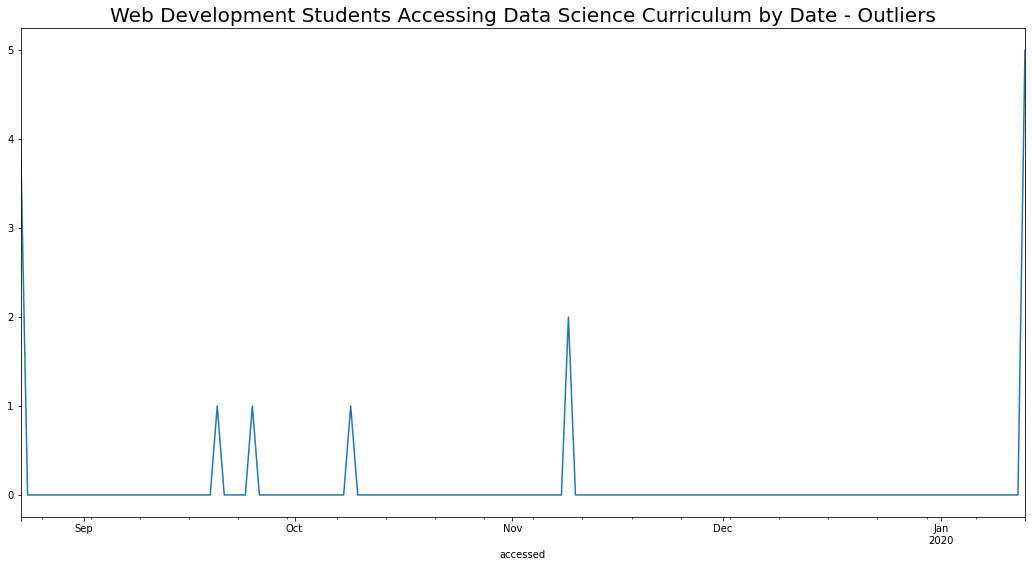

In [30]:
plt.figure(figsize = (18, 9))
daily_wd_to_ds_access.program_id.plot()
plt.title('Web Development Students Accessing Data Science Curriculum by Date - Outliers', fontsize=20)
plt.show()

**Notes:** Outliers within web development show cross-curriculum access on 13 Jan 2020. (5 hits.)

In [31]:
after_2019.groupby(wd_to_ds_access.cohort).count()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
cohort,,,,,,,,,,,
Betelgeuse,5,5,5,5,5,5,5,5,5,5,5


In [32]:
after_2019.groupby(wd_to_ds_access.user_id).count()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
user_id,,,,,,,,,,,
410,5,5,5,5,5,5,5,5,5,5,5


In [33]:
# determine what a web development course is using java
ds_to_wd_access=ds[ds.path.str.contains('java')]

In [34]:
# create data for wd students viewing ds curriculum after 2019 
after_2019_ds_out = ds_to_wd_access['2019-12-31':]

In [35]:
# view daily cross-access from DS to WD
daily_ds_to_wd_access=ds_to_wd_access.resample('D').count()

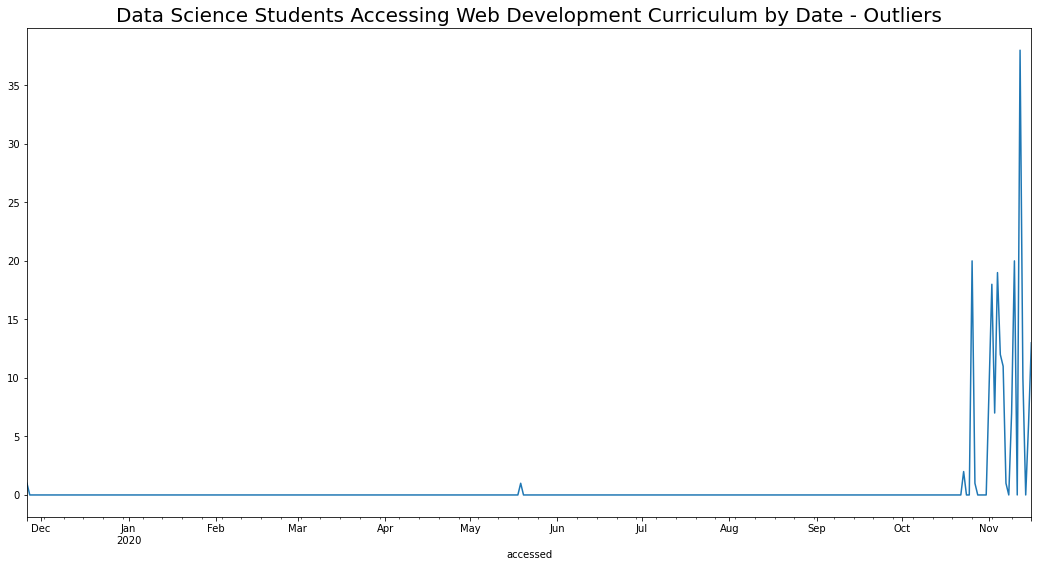

In [36]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot()
plt.title('Data Science Students Accessing Web Development Curriculum by Date - Outliers', fontsize=20)
plt.show()

**Notes:** Outliers within data science has one cross-curriculum use in May 2020.

In [37]:
after_2019_ds_out.groupby(after_2019_ds_out.cohort).count()

,accessed,path,ip,user_id,program_id,program_type,start_date,end_date,lesson,hour
cohort,,,,,,,,,,
Curie,1,1,1,1,1,1,1,1,1,1
Darden,194,194,194,194,194,194,194,194,194,194


In [38]:
after_2019_ds_out.groupby(after_2019_ds_out.user_id).count()

,accessed,path,ip,program_id,program_type,cohort,start_date,end_date,lesson,hour
user_id,,,,,,,,,,
590,1,1,1,1,1,1,1,1,1,1
782,194,194,194,194,194,194,194,194,194,194


In [39]:
df_outliers[(df_outliers.user_id==590) & (df_outliers.path.str.contains('java'))]

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
accessed,,,,,,,,,,,
2020-05-19 16:03:32,2020-05-19 16:03:32,java-ii/object-oriented-programming,130.45.47.56,590,3.0,Data Science,Curie,2020-02-03,2020-07-07,java-ii.object-oriented-programming,16


In [40]:
df_outliers[(df_outliers.user_id==782)].head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
accessed,,,,,,,,,,,
2020-10-23 23:04:14,2020-10-23 23:04:14,java-ii,67.11.117.74,782,3.0,Data Science,Darden,2020-07-13,2021-01-12,Not Lesson,23
2020-10-23 23:04:16,2020-10-23 23:04:16,java-ii/collections,67.11.117.74,782,3.0,Data Science,Darden,2020-07-13,2021-01-12,java-ii.collections,23
2020-10-26 01:00:55,2020-10-26 01:00:55,mysql,67.11.117.74,782,3.0,Data Science,Darden,2020-07-13,2021-01-12,Not Lesson,1
2020-10-26 01:00:58,2020-10-26 01:00:58,mysql/users,67.11.117.74,782,3.0,Data Science,Darden,2020-07-13,2021-01-12,mysql.users,1
2020-10-26 01:01:38,2020-10-26 01:01:38,mysql/introduction,67.11.117.74,782,3.0,Data Science,Darden,2020-07-13,2021-01-12,mysql.introduction,1


**Notes:** User 782 seems to have incorrectly been labeled as a Data Science student. User 782's access will be removed from the visual.

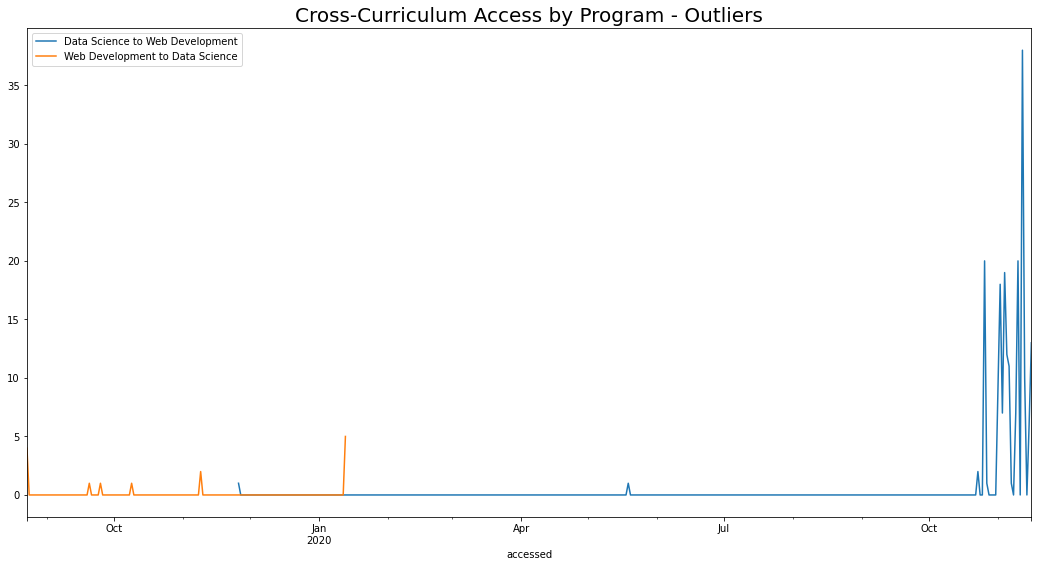

In [41]:
plt.figure(figsize = (18, 9))
daily_ds_to_wd_access.program_id.plot(label='Data Science to Web Development')
daily_wd_to_ds_access.program_id.plot(label='Web Development to Data Science')
plt.title('Cross-Curriculum Access by Program - Outliers', fontsize=20)
plt.legend()
plt.show()

In [42]:
joint.head()

,accessed,path,ip,user_id,program_id,program_type,cohort,start_date,end_date,lesson,hour
1,2018-01-26 09:56:02,java-ii,97.105.19.61,1,1.0,Web Development,Hampton,2015-09-22,2016-02-06,Not Lesson,9
2,2018-01-26 09:56:05,java-ii/object-oriented-programming,97.105.19.61,1,1.0,Web Development,Hampton,2015-09-22,2016-02-06,java-ii.object-oriented-programming,9
3,2018-01-26 09:56:06,slides/object_oriented_programming,97.105.19.61,1,1.0,Web Development,Hampton,2015-09-22,2016-02-06,slides.object_oriented_programming,9
4,2018-01-26 09:56:24,javascript-i/conditionals,97.105.19.61,2,2.0,Web Development,Teddy,2018-01-08,2018-05-17,javascript-i.conditionals,9
5,2018-01-26 09:56:41,javascript-i/loops,97.105.19.61,2,2.0,Web Development,Teddy,2018-01-08,2018-05-17,javascript-i.loops,9
